In [37]:
from tensorflow.keras.datasets.cifar10 import load_data

In [38]:
(x_train, y_train), (x_test, y_test) = load_data()

In [39]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [40]:
import matplotlib.pyplot as plt

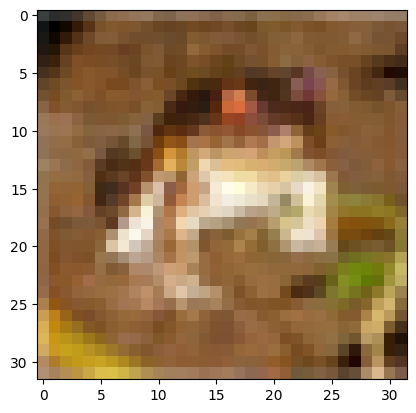

In [41]:
plt.imshow(x_train[0])

In [42]:
y_train[0]

array([6], dtype=uint8)

0   airplane

1   automobile

2   bird

3   cat

4   deer

5   dog

6   frog

7   horse

8   ship

9   truck

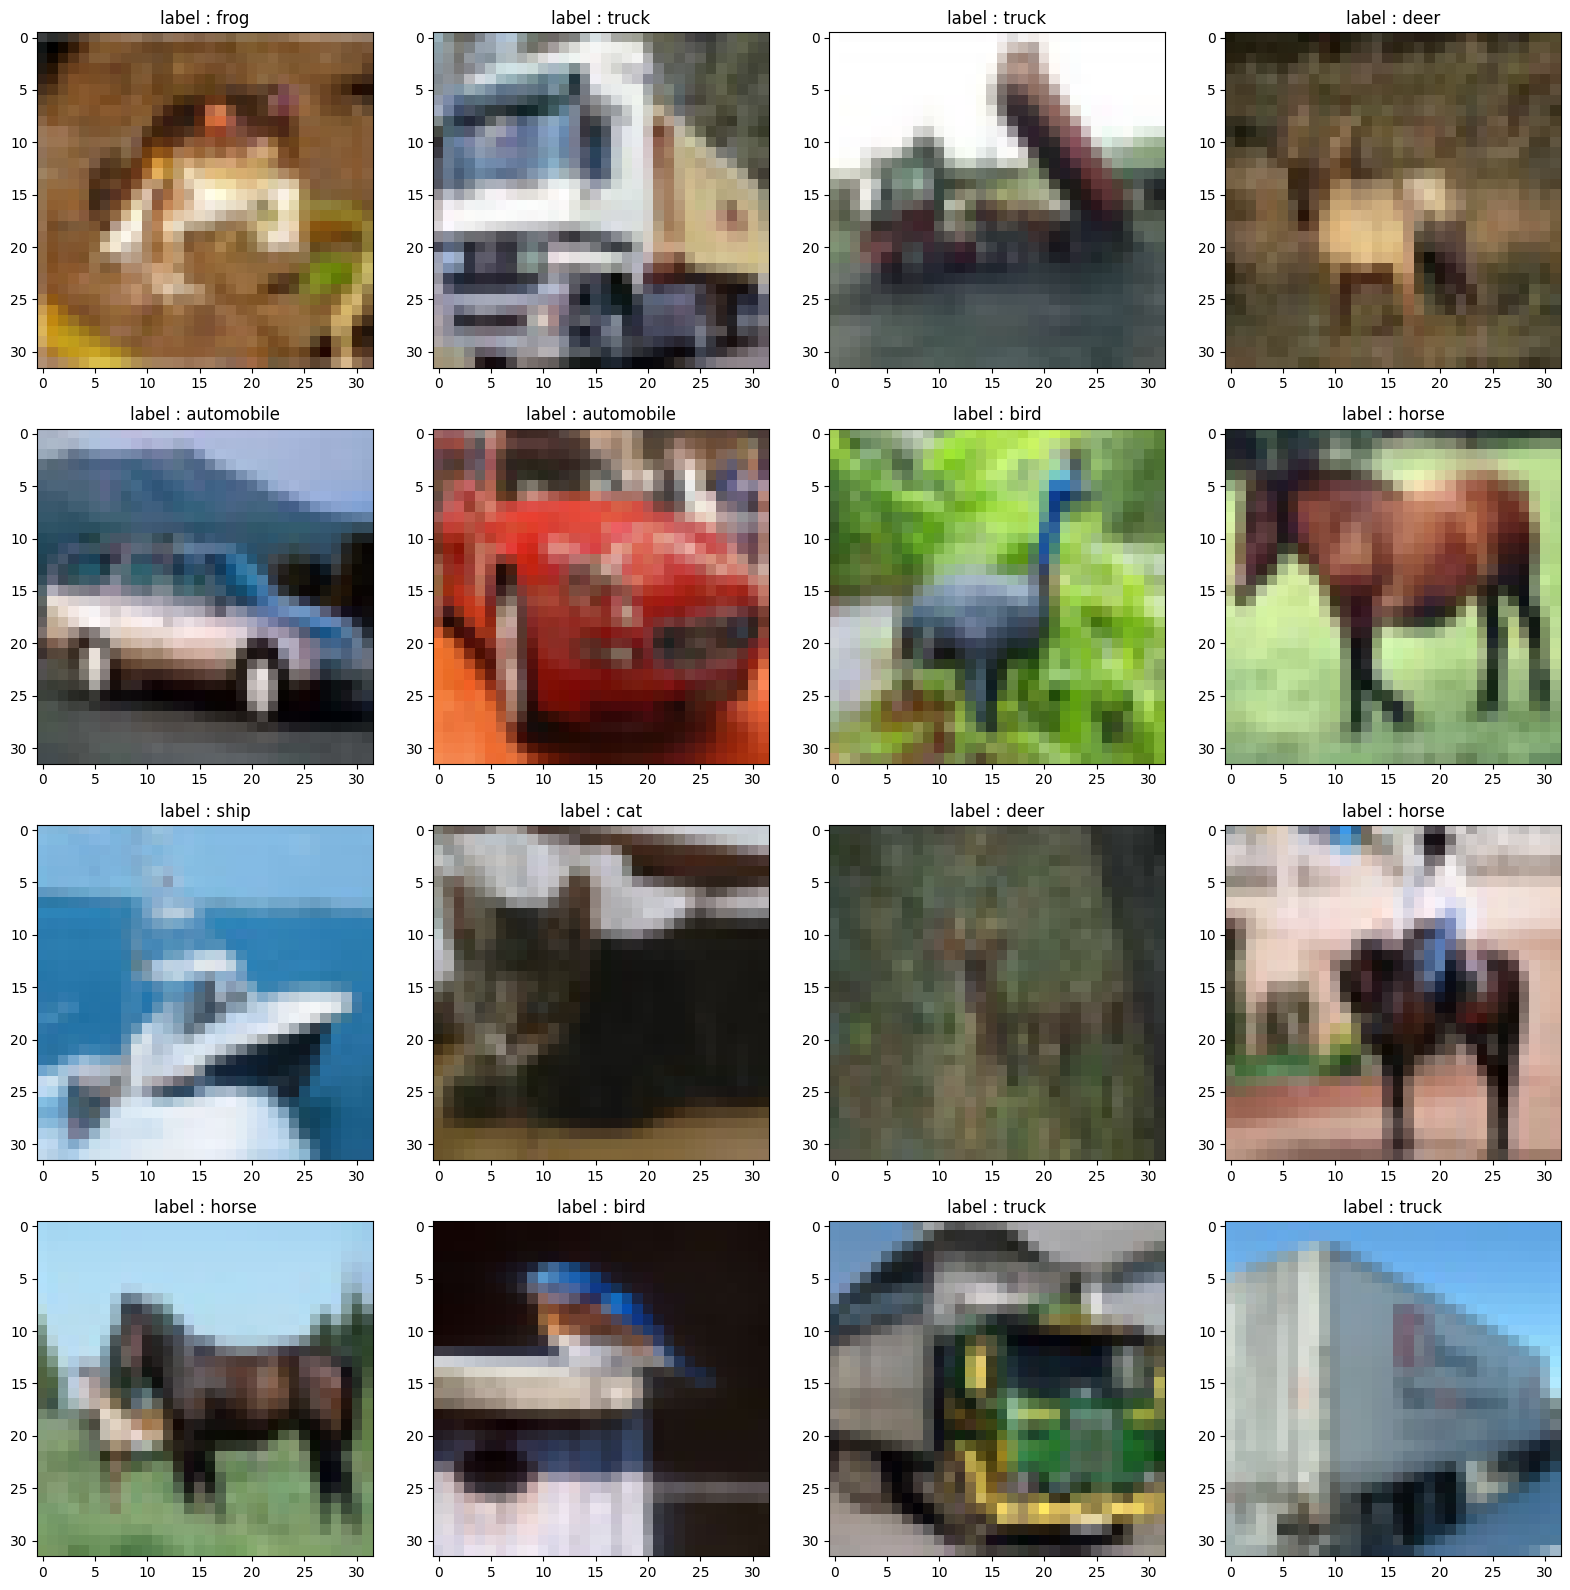

In [43]:
cifar10_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(16, 16))

for idx, sample in enumerate(x_train[:16]):
    plt.subplot(4, 4, idx+1)
    plt.imshow(sample)
    plt.title(f"label : {cifar10_names[y_train[idx][0]]}")

plt.tight_layout()
plt.show()

In [44]:
# CNN을 이용하여 학습하고 모델 평가 해보자

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [46]:
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(32, input_shape=(32, 32, 3), kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [50]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stopping = EarlyStopping(patience=3)

In [52]:
start_time = time()

result = model.fit(x_train_scale, y_train, epochs=10, batch_size=100, validation_split=0.3, callbacks=[early_stopping])

print(f"fit time : {time() - start_time}")

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - acc: 0.2994 - loss: 1.8916 - val_acc: 0.4827 - val_loss: 1.4240
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - acc: 0.5079 - loss: 1.3752 - val_acc: 0.5586 - val_loss: 1.2445
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - acc: 0.5780 - loss: 1.1882 - val_acc: 0.5782 - val_loss: 1.2157
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - acc: 0.6341 - loss: 1.0477 - val_acc: 0.6321 - val_loss: 1.0605
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - acc: 0.6603 - loss: 0.9647 - val_acc: 0.6357 - val_loss: 1.0475
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - acc: 0.6883 - loss: 0.8836 - val_acc: 0.6654 - val_loss: 0.9744
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - acc: 0.7236 - loss: 0.7901 - val_acc: 0.6794 - val_loss: 0.9397
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - acc: 0.7429 - loss: 0.7368 - val_acc: 0.6733 - val_loss: 0.9702
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,440 (2.60 MB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454,294 (1.73 MB)

In [54]:
model.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.6977 - loss: 0.9130


[0.9181836843490601, 0.6958000063896179]

In [55]:
predict = model.predict(x_train_scale)
predict_label = np.argmax(predict, axis=1)

print(y_test)
print(predict_label)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[6 9 9 ... 9 1 0]


In [56]:
wrong_predict = list()

for i in range(len(y_test)):
    if predict_label[i] != y_test[i]:
        wrong_predict.append(i)

print(len(wrong_predict))

8999
